In [1]:
import pandas as pd
import math
from functools import reduce
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
"analyze the decay rate of each antigen at the specific concentration which was subjected to different treatment."

'analyze the decay rate of each antigen at the specific concentration which was subjected to different treatment.'

In [3]:
main_df = pd.read_excel('C:/Users/lzoeckler/Desktop/decay/DBS_stability_2.xlsx')
main_df.rename(columns={'Unnamed: 0': 'analyte', 'Unnamed: 1': 'treatment_condition',
                       'Unnamed: 2': 'time_or_humidity'}, inplace=True)
main_df.loc[main_df['analyte'] == 'Pv LDH', 'analyte'] = 'Pv_LDH'
main_df.loc[main_df['analyte'] == 'Pf LDH', 'analyte'] = 'Pf_LDH'
main_df.head()

,analyte,treatment_condition,time_or_humidity,Hi,Med,Low
0,HRP2,-20oC,1.0,1546.99,806.53,79.33
1,HRP2,-20oC,3.0,1300.62,791.51,64.99
2,HRP2,-20oC,7.0,1582.84,897.24,88.90
3,HRP2,-20oC,15.0,1547.39,691.08,67.17
4,HRP2,-20oC,30.0,1648.93,927.27,93.60


In [4]:
main_df['analyte'].unique()

array(['HRP2', 'Pv_LDH', 'Pf_LDH', 'CRP'], dtype=object)

In [5]:
def temp_adjust(df):
    temp = df['treatment_condition']
    temp = temp.replace("oC", "")
    temp = int(temp)
    return temp

In [6]:
time_df = main_df.loc[main_df['treatment_condition'] != 'Humidity']
time_df['treatment_condition'] = time_df.apply(temp_adjust, axis=1)
time_df['treatment_condition'].unique()

C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([-20,   4,  23,  30,  50], dtype=int64)

In [7]:
time_df['time_or_humidity'].unique()

array([  1.,   3.,   7.,  15.,  30.,  60., 120., 240.])

In [8]:
time_df.loc[(time_df['treatment_condition'] == 4)
            & (time_df['analyte'] == 'Pf_LDH')]

,analyte,treatment_condition,time_or_humidity,Hi,Med,Low
48,Pf_LDH,4,1.0,14046.28,8512.34,699.70
49,Pf_LDH,4,3.0,10830.68,6827.24,733.67
50,Pf_LDH,4,7.0,12851.85,6780.80,1020.71
51,Pf_LDH,4,15.0,10828.34,6620.00,717.24
52,Pf_LDH,4,30.0,11073.76,7259.36,726.47
53,Pf_LDH,4,60.0,9051.57,6087.39,734.50
54,Pf_LDH,4,120.0,10267.39,5463.79,567.97
55,Pf_LDH,4,240.0,8830.77,5670.04,642.13


In [9]:
base_value_df = time_df.loc[time_df['treatment_condition'] == -20]
base_value_df = base_value_df.groupby(['analyte', 'treatment_condition']).mean().reset_index()
base_value_df.drop(['treatment_condition', 'time_or_humidity'], axis=1, inplace=True)
base_value_df

,analyte,Hi,Med,Low
0,CRP,17950.92500,7628.23500,699.82500
1,HRP2,1534.43625,825.94375,83.70375
2,Pf_LDH,12022.15500,6948.41500,796.22750
3,Pv_LDH,4976.20875,2897.74000,312.14625


In [10]:
time_df = time_df.loc[time_df['treatment_condition'] != -20]
time_df = time_df.merge(base_value_df, on='analyte', suffixes=('', '_base'))
time_df.head()

,analyte,treatment_condition,time_or_humidity,Hi,Med,Low,Hi_base,Med_base,Low_base
0,HRP2,4,1.0,1937.11,1006.40,79.08,1534.43625,825.94375,83.70375
1,HRP2,4,3.0,1438.96,875.57,76.59,1534.43625,825.94375,83.70375
2,HRP2,4,7.0,1748.31,945.54,105.97,1534.43625,825.94375,83.70375
3,HRP2,4,15.0,1563.24,809.20,73.14,1534.43625,825.94375,83.70375
4,HRP2,4,30.0,1716.19,1039.20,222.44,1534.43625,825.94375,83.70375


C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

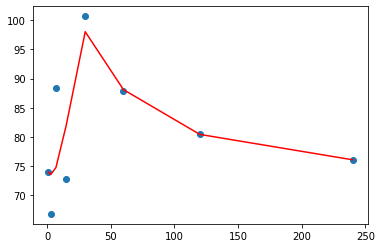

In [71]:
dfs = []
#for analyte in time_df['analyte'].unique():
for analyte in ['HRP2']:
    an_df = time_df.loc[time_df['analyte'] == analyte]
    #for concentration in ['Hi', 'Med', 'Low']:
    for concentration in ['Low']:
        con_df = an_df[['treatment_condition', 'time_or_humidity',
                        concentration, '{}_base'.format(concentration)]]
        end_df = con_df.loc[con_df['time_or_humidity'] == 240.0]
        end_df['decay'] = True
        end_df.loc[end_df[concentration] > end_df['{}_base'.format(concentration)], 'decay'] = False
        end_df.drop(['time_or_humidity', concentration, '{}_base'.format(concentration)], axis=1, inplace=True)
        con_df = con_df.merge(end_df, on=['treatment_condition'])
        calc_df = con_df.loc[con_df['decay'] == True]
        base_val = calc_df['{}_base'.format(concentration)].tolist()[0]
        #for temp in an_df['treatment_condition'].unique():
        for temp in [23]:
            temp_df = calc_df.loc[calc_df['treatment_condition'] == temp]
            temp_df.drop(['decay', 'treatment_condition', '{}_base'.format(concentration)], axis=1, inplace=True)
            poly = PolynomialFeatures(degree=5)
            regr = linear_model.LinearRegression()
            time = temp_df['time_or_humidity'].values.reshape(-1,1)
            con = temp_df[concentration].values.reshape(-1,1)
            poly_time = poly.fit_transform(time)
            regr.fit(poly_time, con)
            pred = regr.predict(poly_time)
            plt.scatter(time, con)
            plt.plot(time, pred, color='red')
            plt.show()

In [69]:
regr.predict(poly.fit_transform([[2315]]))

array([[-1.27285224e+12]])

In [61]:
pred

array([[77.84704868],
       [78.22204755],
       [78.95162679],
       [80.3291113 ],
       [82.61837887],
       [86.04837363],
       [88.31420163],
       [74.46921155]])

In [20]:
def calc_lambda(df):
    numerator = math.log(float(df['Nt']) / float(df['N0']))
    lam = numerator / (-1 * float(df['t']))
    return lam

In [12]:
def calc_half(df):
    return math.log(2) / df['lambda']

In [13]:
dfs = []
for concentration in ['Hi', 'Med', 'Low']:
    con_df = time_df[['analyte', 'treatment_condition', 'time_or_humidity',
                      concentration, '{}_base'.format(concentration)]]
    end_df = con_df.loc[con_df['time_or_humidity'] == 240.0]
    end_df['decay'] = True
    end_df.loc[end_df[concentration] > end_df['{}_base'.format(concentration)], 'decay'] = False
    end_df.drop(['time_or_humidity', concentration, '{}_base'.format(concentration)], axis=1, inplace=True)
    con_df = con_df.merge(end_df, on=['analyte', 'treatment_condition'])
    calc_df = con_df.loc[con_df['decay'] == True]
    calc_df = calc_df.loc[calc_df['time_or_humidity'] == 240.0]
    calc_df.rename(columns={concentration: 'Nt', '{}_base'.format(concentration): 'N0',
                            'time_or_humidity': 't'}, inplace=True)
    calc_df['lambda'] = calc_df.apply(calc_lambda, axis=1)
    calc_df['{}_half_life'.format(concentration)] = calc_df.apply(calc_half, axis=1)
    calc_df.drop(['t', 'Nt', 'N0', 'decay', 'lambda'], axis=1, inplace=True)
    dfs.append(calc_df)
all_df = reduce(lambda left, right: pd.merge(left, right, on=['analyte', 'treatment_condition']), dfs)
all_df

C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,analyte,treatment_condition,Hi_half_life,Med_half_life,Low_half_life
0,HRP2,23oC,2315.663298,830.636875,1739.576004
1,HRP2,30oC,428.983949,397.209718,426.702699
2,HRP2,50oC,87.711358,105.384618,92.025929
3,Pv_LDH,4oC,808.254122,1564.243383,1339.862434
4,Pv_LDH,23oC,211.254384,196.495236,186.728350
5,Pv_LDH,30oC,133.776544,134.498434,121.473584
6,Pv_LDH,50oC,30.165834,32.164795,55.307855
7,Pf_LDH,4oC,539.223595,818.205035,773.406925
8,Pf_LDH,23oC,174.446928,168.679269,180.677475
9,Pf_LDH,30oC,114.718260,118.205629,111.456745


In [50]:
all_df.to_csv('C:/Users/lzoeckler/Desktop/decay/half_life.csv', index=False)

In [43]:
filt = (time_df['Hi'] >= time_df['Hi_base']) | (time_df['Med'] >= time_df[
    'Med_base']) | (time_df['Low'] >= time_df['Low_base'])
time_df.loc[~filt].head()

,analyte,treatment_condition,time_or_humidity,Hi,Med,Low,Hi_base,Med_base,Low_base
14,HRP2,23oC,120.0,1239.33,683.33,80.44,1534.43625,825.94375,83.70375
15,HRP2,23oC,240.0,1428.07,676.04,76.07,1534.43625,825.94375,83.70375
17,HRP2,30oC,3.0,1354.28,753.36,74.00,1534.43625,825.94375,83.70375
19,HRP2,30oC,15.0,1286.84,650.77,68.25,1534.43625,825.94375,83.70375
21,HRP2,30oC,60.0,1179.76,623.36,73.76,1534.43625,825.94375,83.70375


In [13]:
hum_df = main_df.loc[main_df['treatment_condition'] == 'Humidity']
hum_df['treatment_condition'].unique()

array(['Humidity'], dtype=object)

In [15]:
hum_df['time_or_humidity'].unique()

array([0.7, 0.4])

In [22]:
hum_df.loc[hum_df['analyte'] == 'HRP2']

,analyte,treatment_condition,time_or_humidity,Hi,Med,Low
160,HRP2,Humidity,0.7,1523.30,858.96,96.40
161,HRP2,Humidity,0.4,2815.54,1217.88,106.56
